In [2]:
import numpy as np
import seaborn as sb
import scipy.stats as sps
import matplotlib.pyplot as plt

In [3]:
# def y_density(x,sigma):
#     return (2/(2*np.sqrt(np.pi*sigma**2))) * np.exp(-(x**2)/(2*sigma**2))

In [4]:
def y_cdf(x,mi,sigma):
    return sps.norm.cdf(mi+x,mi,sigma) - sps.norm.cdf(mi-x,mi,sigma)

In [5]:
def y_pdf(x,mi,sigma):
    return sps.norm.pdf(mi+x,mi,sigma) + sps.norm.pdf(mi-x,mi,sigma)

In [6]:
def generate_Y(mi, sigma,n):
    x = np.random.normal(mi, sigma,n)
    y = abs(x-mi)
    return y

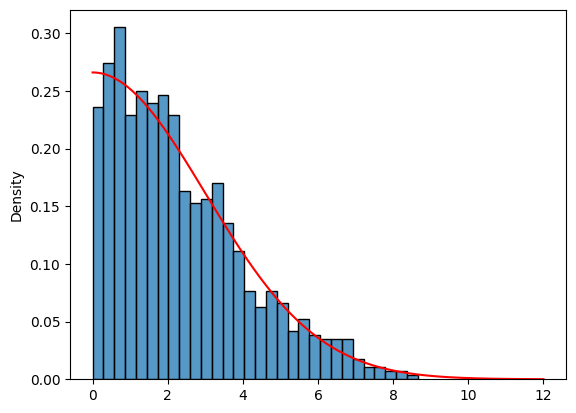

In [7]:
mi = 2
sigma = 3
n = 10**3
y_sample = generate_Y(mi,sigma,n)

value_range = np.linspace(0,12,10**4)
sb.histplot(y_sample, stat="density",bins=30)
plt.plot(value_range, y_pdf(value_range,mi,sigma),color="red")

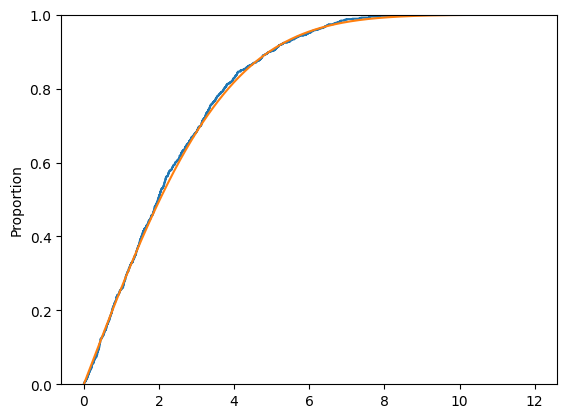

In [8]:
sb.ecdfplot(y_sample)
plt.plot(value_range,y_cdf(value_range,mi,sigma))

In [9]:
def rozklady_estymatora(mi,sigma,n):
    x = np.random.normal(mi, sigma,n)
    y = abs(x-mi)
    sigma_1 = (np.sqrt(2*np.pi))/(2*n)*np.sum(y)
    sigma_2 = np.sqrt((1/n)*np.sum(np.power(y,2)))
    return sigma_1,sigma_2

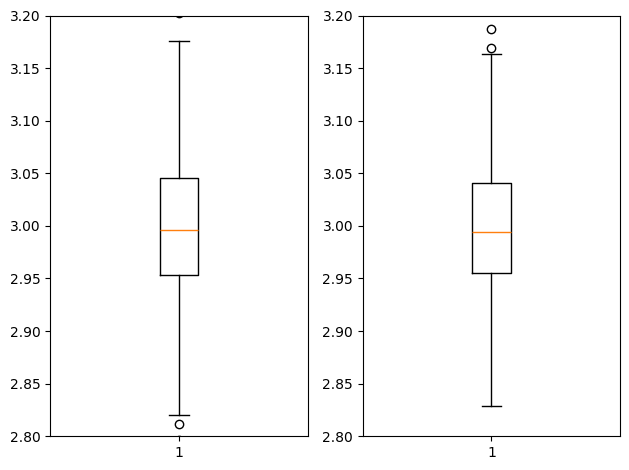

In [10]:
n = 10**3
m = 10**3
sigma1 = np.zeros(m)
sigma2 = np.zeros(m)
for i in range(m):
    estymatory = rozklady_estymatora(mi,sigma,n)
    sigma1[i] = estymatory[0]
    sigma2[i] = estymatory[1]

plot1 = plt.subplot2grid((1, 2), (0, 0)) 
plt.boxplot(sigma1)
plot1.set_ylim([2.8,3.2])
plot2 = plt.subplot2grid((1, 2), (0, 1)) 
plt.boxplot(sigma2)
plot2.set_ylim([2.8,3.2])
plt.tight_layout()

w domu:
dla ostatniego przykładu, czyli obliczonych m estymatorów obliczyć ich wartość oczekiwaną i wariancję
przedstawić jak się to będzie zmieniać dla różnych m


In [13]:
n_values = np.arange(10,1000,10)
sigma1_means = np.zeros(len(n_values))
sigma1_vars = np.zeros(len(n_values))
sigma2_means = np.zeros(len(n_values))
sigma2_vars = np.zeros(len(n_values))
for i in range(len(n_values)):
    sigma1 = np.zeros(n_values[i])
    sigma2 = np.zeros(n_values[i])
    for j in range(n_values[i]):
        estymatory = rozklady_estymatora(mi,sigma,n_values[i])
        sigma1[j] = estymatory[0]
        sigma2[j] = estymatory[1]
    sigma1_means[i] = np.mean(sigma1)
    sigma1_vars[i] = np.var(sigma1)
    sigma2_means[i] = np.mean(sigma2)
    sigma2_vars[i] = np.var(sigma2)




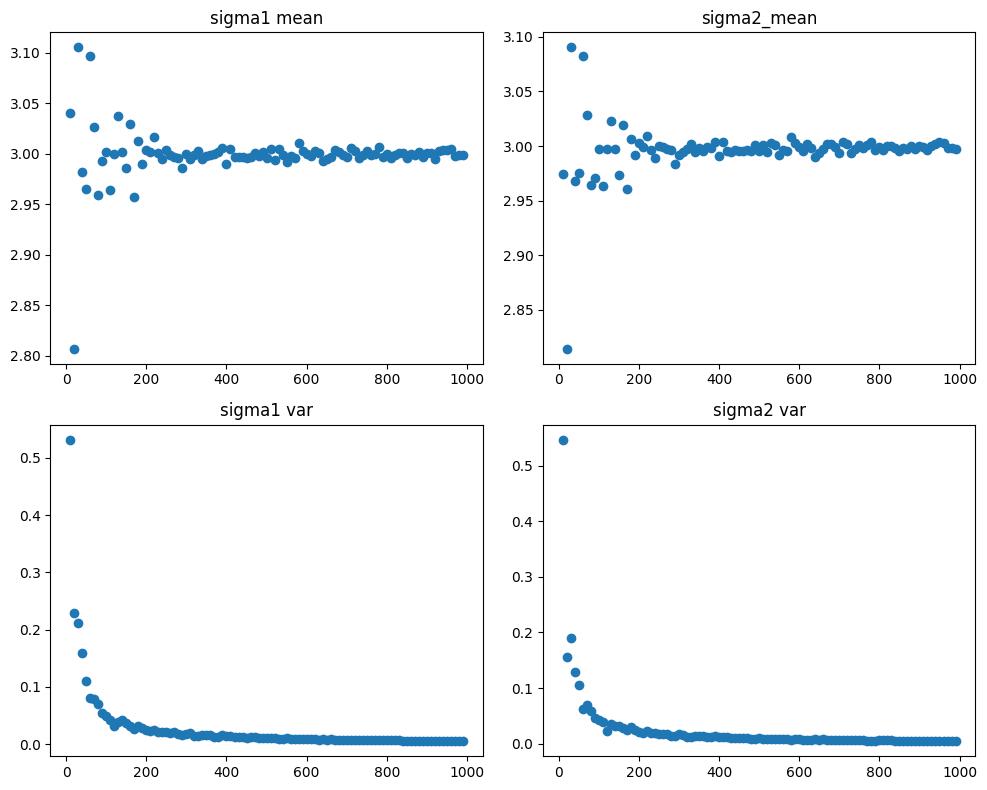

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Pierwszy wykres (1,1)
axs[0, 0].scatter(m_values, sigma1_means)
axs[0, 0].set_title('sigma1 mean')

# Drugi wykres (1,2)
axs[0, 1].scatter(m_values, sigma2_means)
axs[0, 1].set_title('sigma2_mean')

# Trzeci wykres (2,1)
axs[1, 0].scatter(m_values, sigma1_vars)
axs[1, 0].set_title('sigma1 var')

# Czwarty wykres (2,2)
axs[1, 1].scatter(m_values, sigma2_vars)
axs[1, 1].set_title('sigma2 var')

plt.tight_layout()